In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DATASET/weather_classification_data.csv")
print(df.shape)
df

(13200, 11)


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
#numerical_columns & categorical_columns
cat = df.select_dtypes(include=object).columns.tolist()
num = df.select_dtypes(exclude=object).columns.tolist()
print(' categorical_columns: ' ,cat)
print('numerical_columns: ' , num)

 categorical_columns:  ['Cloud Cover', 'Season', 'Location', 'Weather Type']
numerical_columns:  ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']


In [ ]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [ ]:
df.nunique()

,0
Temperature,126
Humidity,90
Wind Speed,97
Precipitation (%),110
Cloud Cover,4
Atmospheric Pressure,5456
UV Index,15
Season,4
Visibility (km),41
Location,3


In [ ]:
df = df.drop(['Atmospheric Pressure'], axis =1)

In [ ]:
df["Weather Type"].value_counts()

,count
Weather Type,
Rainy,3300
Cloudy,3300
Sunny,3300
Snowy,3300


In [ ]:
for col in cat:
    print(f"{col} has {df[col].unique()} values\n")

Cloud Cover has ['partly cloudy' 'clear' 'overcast' 'cloudy'] values

Season has ['Winter' 'Spring' 'Summer' 'Autumn'] values

Location has ['inland' 'mountain' 'coastal'] values

Weather Type has ['Rainy' 'Cloudy' 'Sunny' 'Snowy'] values



In [ ]:
# converting categorical Columns
df.replace({'Cloud Cover':{'partly cloudy':0,'clear':1,'overcast':2,'cloudy':3}}, inplace=True)
df.replace({'Season':{'Winter':0,'Spring':1,'Summer':2,'Autumn':3}}, inplace=True)
df.replace({'Location':{'inland':0,'mountain':1,'coastal':2}}, inplace=True)
df.replace({'Weather Type':{'Rainy':0,'Cloudy':1,'Sunny':2,'Snowy':3}}, inplace=True)


In [ ]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,0,2,0,3.5,0,0
1,39.0,96,8.5,71.0,0,7,1,10.0,0,1
2,30.0,64,7.0,16.0,1,5,1,5.5,1,2
3,38.0,83,1.5,82.0,1,7,1,1.0,2,2
4,27.0,74,17.0,66.0,2,1,0,2.5,1,0
...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,2,1,2,1.0,1,0
13196,-1.0,76,3.5,23.0,3,1,0,6.0,2,3
13197,30.0,77,5.5,28.0,2,3,3,9.0,2,1
13198,3.0,76,10.0,94.0,2,0,0,2.0,0,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        13200 non-null  float64
 1   Humidity           13200 non-null  int64  
 2   Wind Speed         13200 non-null  float64
 3   Precipitation (%)  13200 non-null  float64
 4   Cloud Cover        13200 non-null  int64  
 5   UV Index           13200 non-null  int64  
 6   Season             13200 non-null  int64  
 7   Visibility (km)    13200 non-null  float64
 8   Location           13200 non-null  int64  
 9   Weather Type       13200 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.0 MB


In [ ]:
# COMPUTATION OF CHI-SQUARE STATISTICS AND CALCULATING CHI-SQUARE SCORE
from sklearn.feature_selection import chi2
X = df.drop(columns=['Weather Type'], axis=1)
y = df['Weather Type']
X

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,0,2,0,3.5,0
1,39.0,96,8.5,71.0,0,7,1,10.0,0
2,30.0,64,7.0,16.0,1,5,1,5.5,1
3,38.0,83,1.5,82.0,1,7,1,1.0,2
4,27.0,74,17.0,66.0,2,1,0,2.5,1
...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,2,1,2,1.0,1
13196,-1.0,76,3.5,23.0,3,1,0,6.0,2
13197,30.0,77,5.5,28.0,2,3,3,9.0,2
13198,3.0,76,10.0,94.0,2,0,0,2.0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
X_train.shape , X_test.shape

((9240, 9), (3960, 9))

In [ ]:
X_train.corr()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,UV Index,Season,Visibility (km),Location
Temperature,1.000000,-0.202934,-0.076888,-0.286786,-0.262053,0.362308,0.366963,0.247616,0.186771
Humidity,-0.202934,1.000000,0.402233,0.637678,0.140534,-0.348529,-0.173477,-0.476873,-0.088244
Wind Speed,-0.076888,0.402233,1.000000,0.443034,0.109099,-0.073867,-0.053509,-0.303854,-0.034978
Precipitation (%),-0.286786,0.637678,0.443034,1.000000,0.256801,-0.290865,-0.201019,-0.456090,-0.099452
Cloud Cover,-0.262053,0.140534,0.109099,0.256801,1.000000,-0.134108,-0.129967,-0.150994,-0.055560
UV Index,0.362308,-0.348529,-0.073867,-0.290865,-0.134108,1.000000,0.195945,0.359659,0.087178
Season,0.366963,-0.173477,-0.053509,-0.201019,-0.129967,0.195945,1.000000,0.229310,0.148030
Visibility (km),0.247616,-0.476873,-0.303854,-0.456090,-0.150994,0.359659,0.229310,1.000000,0.103985
Location,0.186771,-0.088244,-0.034978,-0.099452,-0.055560,0.087178,0.148030,0.103985,1.000000


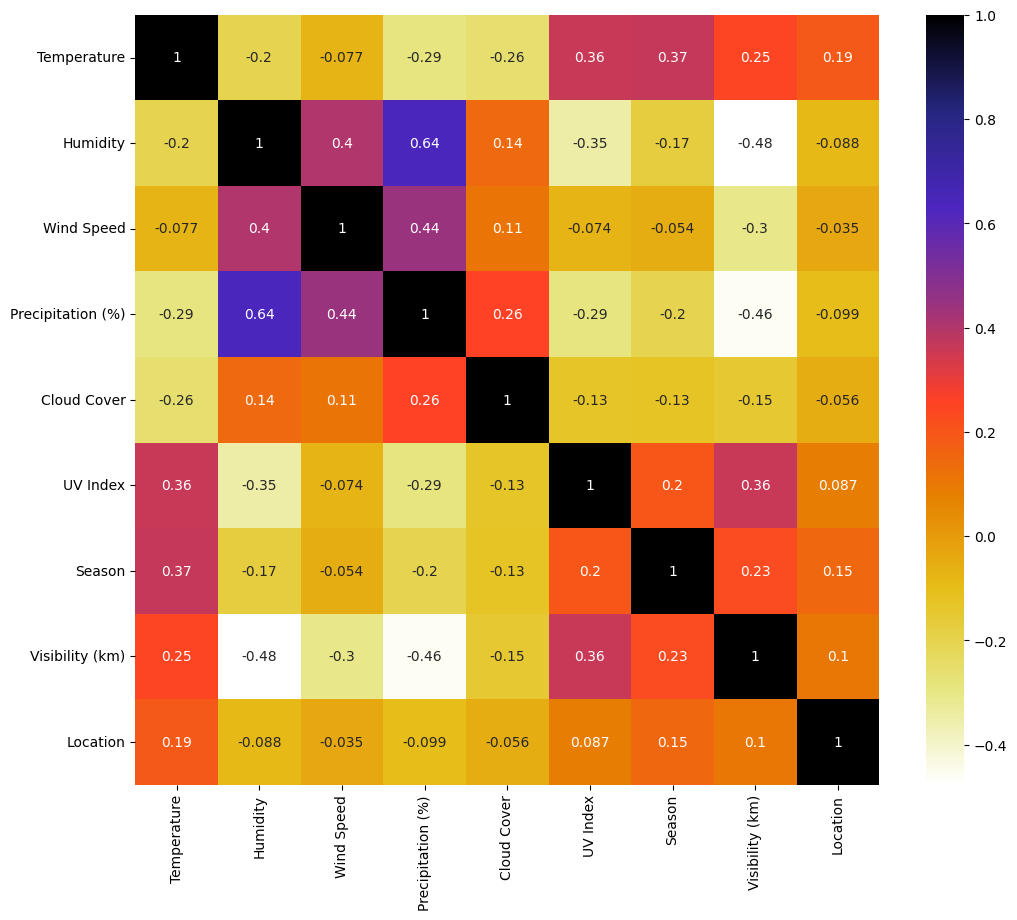

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor=X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset , threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    print(i)
    for j in range (i):
      print("J = ", j)
      print(corr_matrix.iloc[i,j])
      if abs (corr_matrix.iloc[i,j]) > threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr



In [ ]:
corr_features=correlation(X_train,0.7)
len(set(corr_features))


0
1
J =  0
-0.20293387837442828
2
J =  0
-0.07688816688134276
J =  1
0.40223342130693934
3
J =  0
-0.28678632089522954
J =  1
0.6376779187681515
J =  2
0.44303424481295833
4
J =  0
-0.2620534732152836
J =  1
0.14053394094785326
J =  2
0.10909928680921112
J =  3
0.2568008525565861
5
J =  0
0.36230831056344104
J =  1
-0.3485287519512204
J =  2
-0.0738671016247121
J =  3
-0.2908654413700947
J =  4
-0.13410805524859842
6
J =  0
0.36696271397360797
J =  1
-0.1734772518198386
J =  2
-0.0535091436747806
J =  3
-0.20101940387225614
J =  4
-0.12996729737402202
J =  5
0.19594530596922122
7
J =  0
0.2476158857146648
J =  1
-0.47687340555234975
J =  2
-0.30385366028474275
J =  3
-0.45609000439698244
J =  4
-0.15099379137404795
J =  5
0.3596590998511843
J =  6
0.22931023695909492
8
J =  0
0.18677133031329873
J =  1
-0.08824443848627167
J =  2
-0.03497755264354217
J =  3
-0.09945187676651285
J =  4
-0.05555978760250034
J =  5
0.08717798172963726
J =  6
0.14802966876869766
J =  7
0.10398470653104624


0

In [ ]:
corr_features

set()

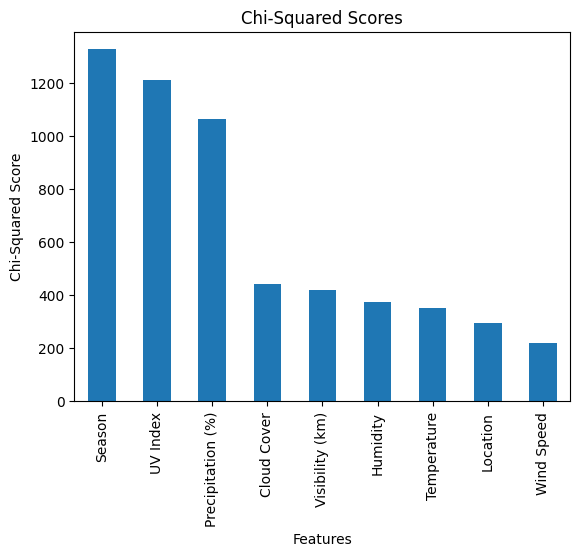

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
import pandas as pd
import matplotlib.pyplot as plt

# Scale data to be between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Compute chi-squared scores
chi_scores = chi2(X_scaled, y)

# Create a Series with feature names and chi-squared scores
chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)

# Plot chi-squared scores
chi_values.plot.bar()
plt.title('Chi-Squared Scores')
plt.xlabel('Features')
plt.ylabel('Chi-Squared Score')
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        13200 non-null  float64
 1   Humidity           13200 non-null  int64  
 2   Wind Speed         13200 non-null  float64
 3   Precipitation (%)  13200 non-null  float64
 4   Cloud Cover        13200 non-null  int64  
 5   UV Index           13200 non-null  int64  
 6   Season             13200 non-null  int64  
 7   Visibility (km)    13200 non-null  float64
 8   Location           13200 non-null  int64  
 9   Weather Type       13200 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.0 MB


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Selecting the top features
X = df[['Temperature','Humidity','Wind Speed','Precipitation (%)','Cloud Cover','UV Index','Season','Visibility (km)','Location']]
y = df['Weather Type']  # Assuming 'class' is the target variable


# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Step 3 (Saving the Scaler): Save the scaler**
joblib.dump(scaler, 'scale.pkl')

# Step 7: Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
}

# Step 8: Train and evaluate each model
results = {}

for name, model in models.items():
    print(f'Training {name}...')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f'{name} Accuracy: {accuracy:.2f}')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('-' * 50)

# Step 9: Compare the models
print('Model Comparison:')
for name, accuracy in results.items():
    print(f'{name}: {accuracy:.2f}')

# Step 10: Save the models
for name, model in models.items():
    joblib.dump(model, f'{name}.pkl')


Training Logistic Regression...
Logistic Regression Accuracy: 0.86
Confusion Matrix:
[[529  45  24  49]
 [ 51 531  45  24]
 [ 46  40 538  17]
 [  7  18  16 660]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       647
           1       0.84      0.82      0.83       651
           2       0.86      0.84      0.85       641
           3       0.88      0.94      0.91       701

    accuracy                           0.86      2640
   macro avg       0.85      0.85      0.85      2640
weighted avg       0.85      0.86      0.85      2640

--------------------------------------------------
Training K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 0.89
Confusion Matrix:
[[578  33  15  21]
 [ 55 565  24   7]
 [ 39  42 551   9]
 [ 19  13   8 661]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       647
           1       0.87      0.87  

In [ ]:
X.head(7)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,0,2,0,3.5,0
1,39.0,96,8.5,71.0,0,7,1,10.0,0
2,30.0,64,7.0,16.0,1,5,1,5.5,1
3,38.0,83,1.5,82.0,1,7,1,1.0,2
4,27.0,74,17.0,66.0,2,1,0,2.5,1
5,32.0,55,3.5,26.0,2,2,2,5.0,0
6,-2.0,97,8.0,86.0,2,1,0,4.0,0


In [ ]:
y.head(7)

,Weather Type
0,0
1,1
2,2
3,2
4,0
5,1
6,3


In [ ]:
import joblib
import numpy as np

# Load the scaler
scaler = joblib.load('/content/scale.pkl')

# Example input data (make sure this matches the feature order and number)
input_data = np.array([[14.0, 73, 9.5, 82.0, 0, 2, 0, 3.5, 0]])

# Transform the input data using the scaler
input_data_scaled = scaler.transform(input_data)

# Load the model (replace 'Logistic Regression.pkl' with your model file)
model = joblib.load('/content/Decision Tree.pkl')

# Make the prediction
y_pred1 = model.predict(input_data_scaled)

print(y_pred1)


[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import joblib
import numpy as np

# Load the scaler
scaler = joblib.load('/content/scale.pkl')

# Example input data (make sure this matches the feature order and number)
input_data = np.array([[39.0	,96	,8.5	,71.0	,0	,7	,1	,10.0	,0]])

# Transform the input data using the scaler
input_data_scaled = scaler.transform(input_data)

# Load the model (replace 'Logistic Regression.pkl' with your model file)
model = joblib.load('/content/Logistic Regression.pkl')

# Make the prediction
y_pred1 = model.predict(input_data_scaled)

print(y_pred1)


[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import joblib
import numpy as np

# Load the scaler
scaler = joblib.load('/content/scale.pkl')

# Example input data (make sure this matches the feature order and number)
input_data = np.array([[38.0	,83	,1.5	,82.0	,1	,7	,1	,1.0	,2]])

# Transform the input data using the scaler
input_data_scaled = scaler.transform(input_data)

# Load the model (replace 'Logistic Regression.pkl' with your model file)
model = joblib.load('/content/Decision Tree.pkl')

# Make the prediction
y_pred1 = model.predict(input_data_scaled)

print(y_pred1)

[2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:

import joblib
import numpy as np

# Load the scaler
scaler = joblib.load('/content/scale.pkl')

# Example input data (make sure this matches the feature order and number)
input_data = np.array([[-2.0,97,8.0,86.0,2,1,0,4.0,0]])

# Transform the input data using the scaler
input_data_scaled = scaler.transform(input_data)

# Load the model (replace 'Logistic Regression.pkl' with your model file)
model = joblib.load('/content/Logistic Regression.pkl')

# Make the prediction
y_pred1 = model.predict(input_data_scaled)

print(y_pred1)


[3]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
